# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')
print("GPU is being used:", tf.config.list_physical_devices('GPU'))

2024-07-03 19:02:07.693743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 19:02:07.786886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 19:02:07.787049: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-03 19:02:07.888628: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-03 19:02:09.173566: W tensorflow/compiler/tf

GPU is being used: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-07-03 19:02:10.139525: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-03 19:02:10.400381: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-03 19:02:10.400743: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Data

In [2]:
data = pd.read_csv("malware.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,657674,1,51,44,5583,0,7.0,0,47238.0,2.0,...,47159.0,1,0.0,0.0,1,0,0.0,0.0,1.0,1
1,205434,1,52,82,6112,0,7.0,0,40501.0,2.0,...,12463.0,0,0.0,0.0,0,0,0.0,0.0,7.0,1
2,452075,1,51,49,5684,0,7.0,0,53447.0,1.0,...,63560.0,1,0.0,0.0,0,0,0.0,0.0,15.0,1
3,1646304,1,52,49,5960,0,7.0,0,53447.0,1.0,...,27260.0,1,0.0,0.0,0,0,0.0,0.0,15.0,1
4,1639531,1,52,82,6196,0,7.0,0,53447.0,1.0,...,42086.0,0,0.0,0.0,0,0,0.0,0.0,7.0,1


In [3]:
data.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census

<Axes: >

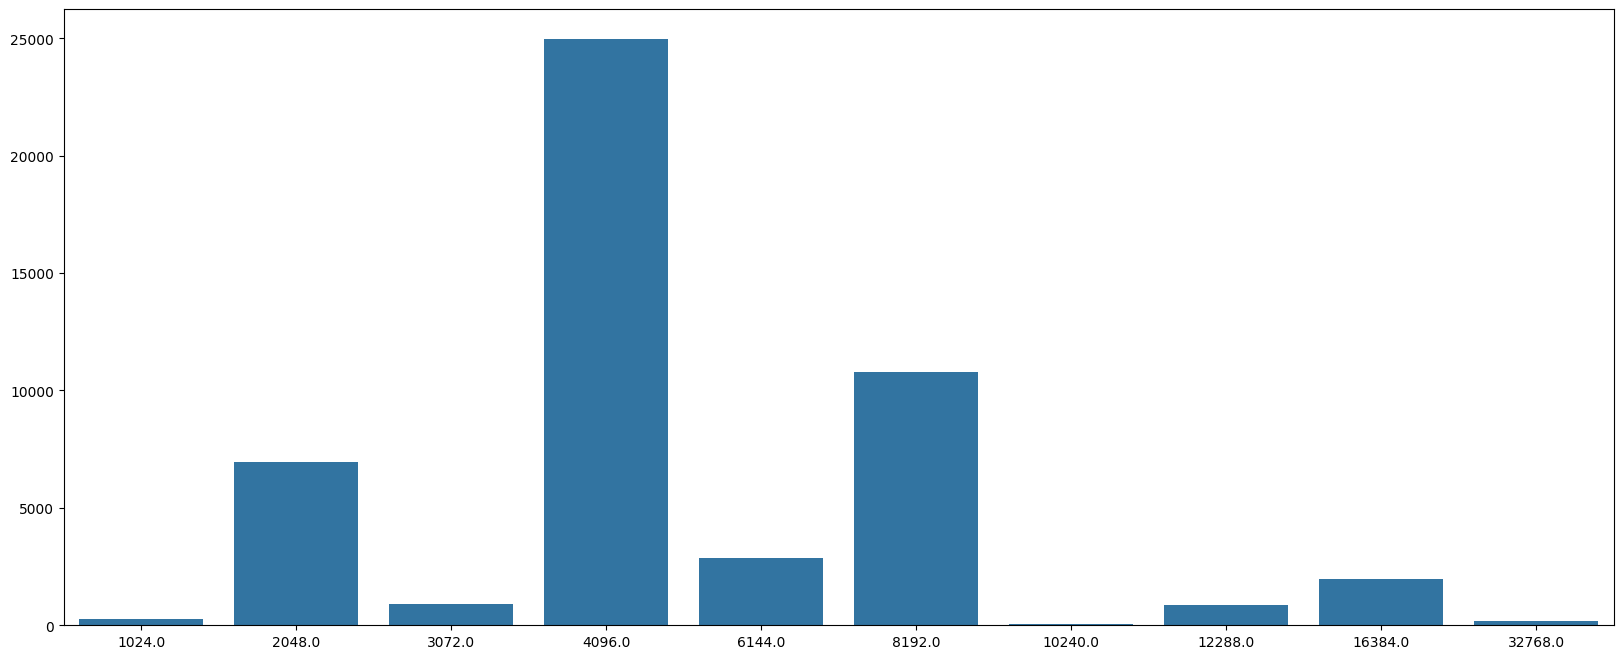

In [4]:
# How much RAM did infected PCs have?
plt.figure(figsize=(20, 8))
plt.tight_layout()
x = dict(data[data['HasDetections'] == 1]['Census_TotalPhysicalRAM'].value_counts().head(10)).keys()
y = dict(data[data['HasDetections'] == 1]['Census_TotalPhysicalRAM'].value_counts().head(10)).values()
sns.barplot(x = list(x), y = list(y))

<Axes: >

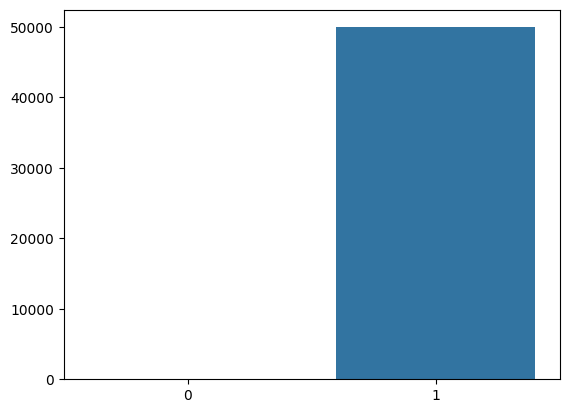

In [5]:
# How many infected PCs had TPM?
plt.tight_layout()
x = dict(data[data['HasDetections'] == 1]['HasTpm'].value_counts()).keys()
y = dict(data[data['HasDetections'] == 1]['HasTpm'].value_counts()).values()
sns.barplot(x = list(x), y = list(y))

<Axes: >

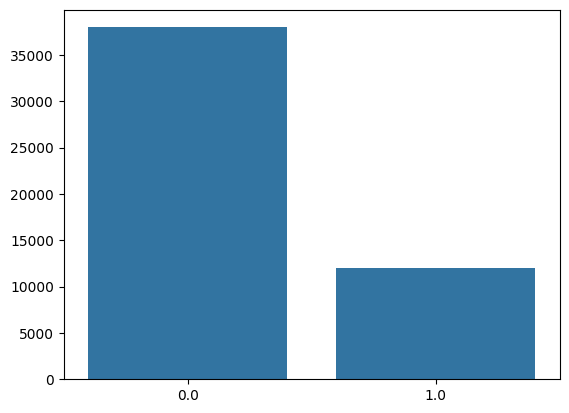

In [6]:
# How many infected PCs had gamer device configuration?
plt.tight_layout()
x = dict(data[data['HasDetections'] == 1]['Wdft_IsGamer'].value_counts()).keys()
y = dict(data[data['HasDetections'] == 1]['Wdft_IsGamer'].value_counts()).values()
sns.barplot(x = list(x), y = list(y))

In [7]:
# How many infected computers had any antivirus protection?
data[data['HasDetections'] == 1]['IsProtected'].value_counts()

IsProtected
1.0    48029
0.0     1971
Name: count, dtype: int64

In [8]:
# Status of Microsoft Smartscreen on the infected computers
data[data['HasDetections'] == 1]['SmartScreen'].value_counts()

SmartScreen
7    35517
3    12430
4      987
8      743
6      225
2       92
1        5
5        1
Name: count, dtype: int64

In [9]:
scaler = StandardScaler()
numericalFeatures = ['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_ThresholdOptIn', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_IsSecureBootEnabled', 'Census_IsWIMBootEnabled', 'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'Wdft_RegionIdentifier']
print(len(numericalFeatures))
data[numericalFeatures] = scaler.fit_transform(data[numericalFeatures])

50


In [10]:
data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,657674,1,51,44,5583,0.0,0.149105,-0.129086,0.011314,1.135504,...,0.621075,0.968651,0.0,-0.03594,2.427303,-0.194828,-0.260089,-0.532942,-1.624310,1
1,205434,1,52,82,6112,0.0,0.149105,-0.129086,-0.448416,1.135504,...,-1.035112,-1.032363,0.0,-0.03594,-0.411980,-0.194828,-0.260089,-0.532942,-0.286010,1
2,452075,1,51,49,5684,0.0,0.149105,-0.129086,0.435013,-0.704561,...,1.403964,0.968651,0.0,-0.03594,-0.411980,-0.194828,-0.260089,-0.532942,1.498389,1
3,1646304,1,52,49,5960,0.0,0.149105,-0.129086,0.435013,-0.704561,...,-0.328788,0.968651,0.0,-0.03594,-0.411980,-0.194828,-0.260089,-0.532942,1.498389,1
4,1639531,1,52,82,6196,0.0,0.149105,-0.129086,0.435013,-0.704561,...,0.378919,-1.032363,0.0,-0.03594,-0.411980,-0.194828,-0.260089,-0.532942,-0.286010,1


# GAN

In [11]:
def generator(latent_dim, data_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(Dense(data_dim, activation = 'tanh'))
    return model

In [12]:
def discriminator(data_dim):
    model = Sequential()
    model.add(Dense(512, input_dim = data_dim))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(Dense(1, activation = 'sigmoid'))
    return model

In [13]:
def gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = True
    model.add(discriminator)
    return model

# Hyperparameters

In [14]:
x = data.drop('HasDetections', axis=1)
y = data['HasDetections']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [15]:
input_dim = x_train.shape[1]
output_dim = x_train.shape[1]
print(input_dim, output_dim)

77 77


In [16]:
generator = generator(input_dim, output_dim)
discriminator = discriminator(input_dim)
sgan = gan(generator, discriminator)

discriminator.compile(optimizer=Adam(3e-4), loss='binary_crossentropy', metrics=['accuracy'])
sgan.compile(optimizer=Adam(3e-4), loss='binary_crossentropy')

2024-07-03 19:02:12.034704: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-03 19:02:12.035045: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-03 19:02:12.035281: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Training the GAN

In [17]:
def train_sgan(generator, discriminator, sgan, X_train, y_train, epochs=1000, batch_size=64):
    half_batch = 32
    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        # print(idx)
        real_samples = X_train.iloc[idx]
        real_labels = y_train.iloc[idx]
        noise = np.random.randn(half_batch, input_dim)
        fake_samples = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        misleading_labels = np.ones((half_batch, 1))
        g_loss = sgan.train_on_batch(noise, misleading_labels)

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | D Loss: {d_loss} | G Loss: {g_loss}")

train_sgan(generator, discriminator, sgan, x_train, y_train)

I0000 00:00:1720013532.570162   81980 service.cc:145] XLA service 0x7592c00037a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720013532.570213   81980 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-07-03 19:02:12.583481: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-03 19:02:12.652876: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


I0000 00:00:1720013533.008335   81980 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch: 0 | D Loss: [5.6608306e+03 6.4843750e-01] | G Loss: [array(3774.1028, dtype=float32), array(3774.1028, dtype=float32), array(0.765625, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━

In [ ]:
test_loss, test_accuracy = discriminator.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4968 - loss: 51617.8047
Test Accuracy: 0.498969703912735
